# importing , inspecting and cleaning the data 

data is in the form of MATLAB .mat file
import from disk or drive

we have 2 data matrices

*   one if the preferred licking direction (tuned)
*   one of them is the non-preferred direction (non-tuned) 

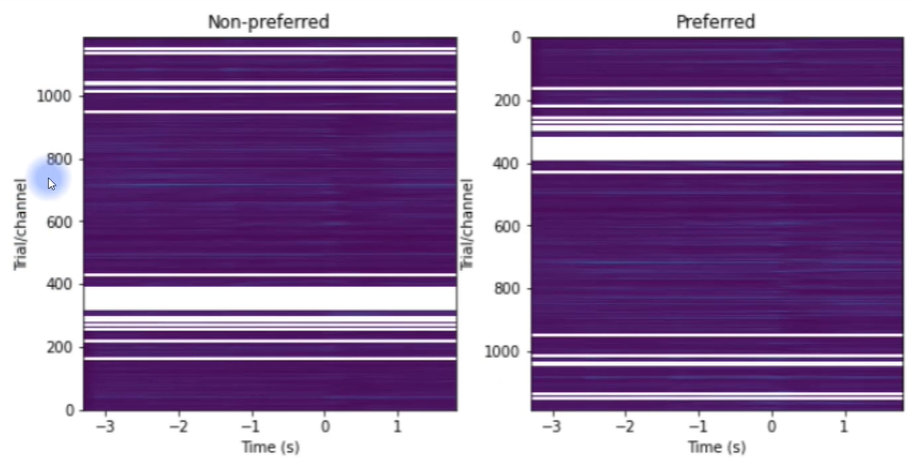





X-axis shows time and the Y-axis shows the rows 

Rows are a combination of trails across the channels(64 neurons).
the experiment was repeated multiple times.

so the data matrix is actually mixed, which we will deal with later 

we have these funny white bars? why is that and fix them. remove the artifact

each row is a timeseries and we can plot each row as a line, each line corresponds to the row in the data matrix

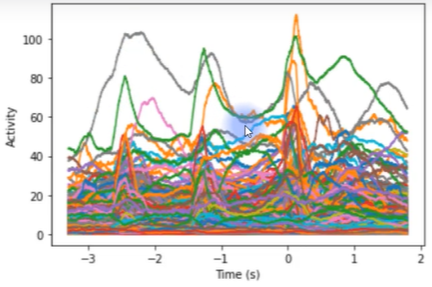


essentially this line will be the activity of each brain cell in different repititions

we see that the white lines/rows in the data matrix are actually empty data and do not contain information 

#after removing the artifacts we will reproduce the data matrix 

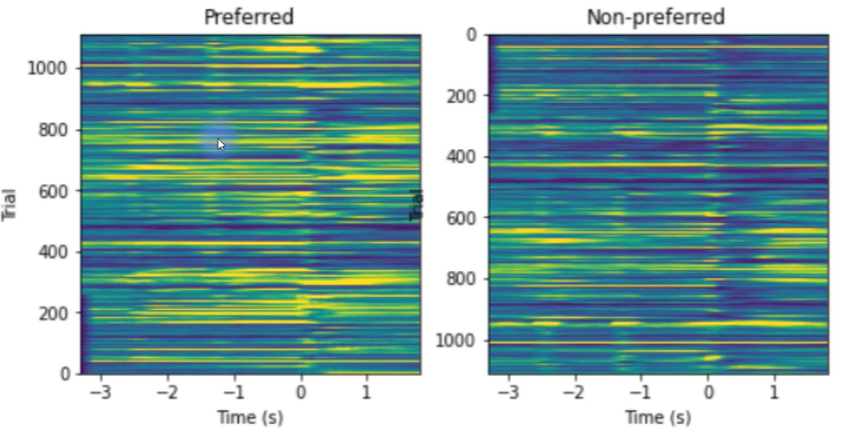

# then we will create a lin plot by averaging over the rows 
this will give us the **average activity in the preferred and non-preffered movement**

we will see that they are perfectly aligned as they start but as we move closer and closer to the lick (t=0) the activities move away from each other, they diverge


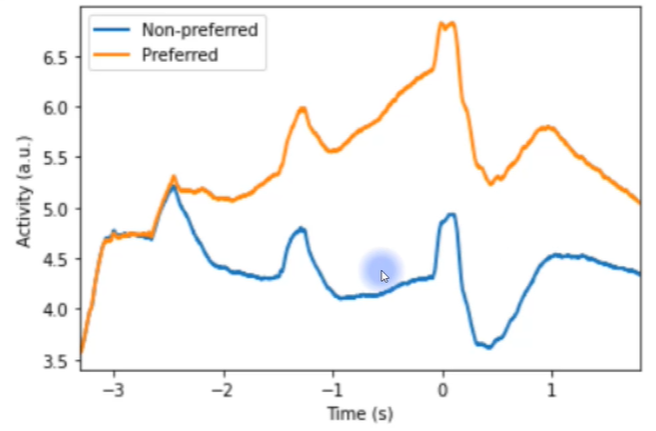

# **implenting in Python**


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
# scipy.io is a submodule of scypy and has input output functions , here we have to import .mat MATLAB file




In [10]:
# importing a file can be done in 2 ways
from google.colab import files
uploaded = files.upload() 

In [11]:
# other way is to mount the Drive onto your Google colab environment
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
# import the mat file from Google Drive
matdat = loadmat('/content/gdrive/MyDrive/Colab Notebooks/Projects/4)State Space Trajectories using PCA/Copy of ALMdata.mat')  # open through files on left and copy the path 

In [13]:
matdat
# we see that it is a dictionary and there is a lot of stuff in it

{'Channel_all': array([[ 1],
        [11],
        [14],
        ...,
        [13],
        [13],
        [14]], dtype=uint8),
 'PSTH_nonprefer_cue_aligned': array([[ 0.11764706,  0.11764706,  0.11764706, ...,  3.76470588,
          3.64705882,  3.76470588],
        [ 0.0862069 ,  0.0862069 ,  0.0862069 , ...,  0.0862069 ,
          0.0862069 ,  0.0862069 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.4       ,
          0.4       ,  0.4       ],
        ...,
        [ 1.53846154,  1.53846154,  1.53846154, ...,  2.15384615,
          2.15384615,  2.15384615],
        [11.16438356, 11.30136986, 11.36986301, ..., 18.42465753,
         18.42465753, 18.49315068],
        [ 3.45238095,  3.51190476,  3.51190476, ...,  2.38095238,
          2.5       ,  2.55952381]]),
 'PSTH_prefer_cue_aligned': array([[ 0.        ,  0.        ,  0.        , ...,  1.47887324,
          1.4084507 ,  1.4084507 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.63829787,
          0.63829787,

In [14]:
# creating the field of the data using the dictionary keys
Nopr = matdat['PSTH_nonprefer_cue_aligned']  # non-preffered activity data matrix
Pref = matdat['PSTH_prefer_cue_aligned']     # preferred activity data matrix
t = matdat['t'][0]                          # time vector
chanidx = matdat['Channel_all']              # tells us which rows in data matrix corresponds to which channel/neuron

print(Nopr.shape), print(' ')
print(Pref.shape), print(' ')
print(t.shape), print(' ')
print(chanidx.shape)



# we see both data matrix are 1186*5101
# and time vector is 5101 long
# therefore it is 1186*5101     channnel/trails = 1186  and time points = 5101

# chanidx is a column vector as 2 dimensions are given(1186*1)

# convert chanidx to an orientationless array'
chanidx = chanidx.flatten()

print(chanidx.shape) # now it will be a one dimention array, orientationless like the time vector

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 
(1186, 1)
(1186,)


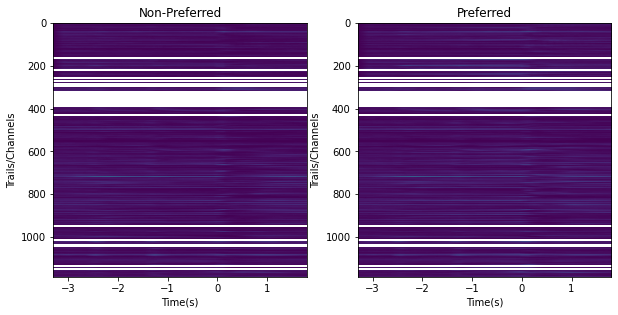

In [15]:
# do some visualization
fig,ax = plt.subplots(1,2,figsize = (10,6))

# ax[0].imshow(Nopr)  # this way X-axis will show the indices and not actual time points of our time series
# for that we will have to use the extent option 
# extent = [x1,x2,y1,y2]  where x1 and x2 are first and last x values and y1 ans y2 are first and last y values


# Y-axis is actually backwards as in Python the first row plotted is actually at the top and then  it comes downwards
# can simply chage the y1 nad y2 order in the extent of imshow
ax[0].imshow(Nopr, extent = [t[0],t[-1],Nopr.shape[0],0])


#then change the aspect ratio according to the data as saw before
ax[0].set_aspect(1/ax[0].get_data_ratio())

ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Trails/Channels')
ax[0].set_title('Non-Preferred')



# plotting the preferred 
ax[1].imshow(Pref, extent = [t[0],t[-1],Pref.shape[0],0])
ax[1].set_aspect(1/ax[0].get_data_ratio())

ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Trails/Channels')
ax[1].set_title('Preferred')

plt.show()

# line plots of each data rows


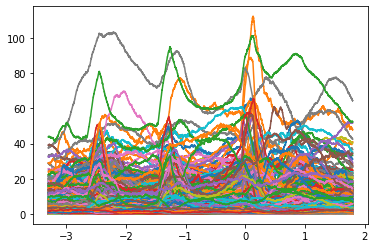

In [16]:
plt.plot(t,Nopr.T) # we need to flip Y so time is on the x axis, so just Transpose it

# which line corresponds to which plot here?


plt.show()

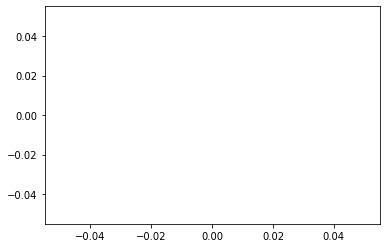

(1186, 5101)


In [17]:
# lets see one of the empty row
plt.plot(t,Nopr[380,:])
plt.show()  # we will see that it will be empty

# see the contents
Nopr[380,:]
# will be all nan(not a number)
print(Nopr.shape)

# getting rid of the empty timeseries

In [18]:
# use a numpy function : isfinite()
# it gives True if input not a nan and False if it is a nan 


print(np.isfinite(np.nan))   # should give False
print(np.isfinite(7))        # should give true

False
True


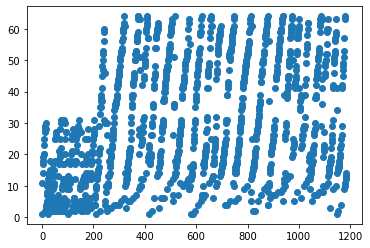

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=uint8)

In [19]:
plt.plot(chanidx,'o')
plt.show()
# although there are 1186 elements in the vector chanidx they range from 1 to 64 only


# so we can look at the unique values 
np.unique(chanidx)  # we see only 64 unique values

In [ ]:
# check for finite rows
# np.isfinite(Nopr[:,0])  # will return a vector of Trues and Falses depending on the elements of the Row 
print(Nopr.shape)
Nopr = Nopr[np.isfinite(Nopr[:,0]),:]
print(Nopr.shape)  # removal of rows that corresponded to nan


# so we also need to remove the Non-finite rows/elements in the chanidx
chanidx = chanidx[np.isfinite(Pref[:,0])]
chanidx.shape


Pref = Pref[np.isfinite(Pref[:,0]),:]

(1186, 5101)
(1111, 5101)


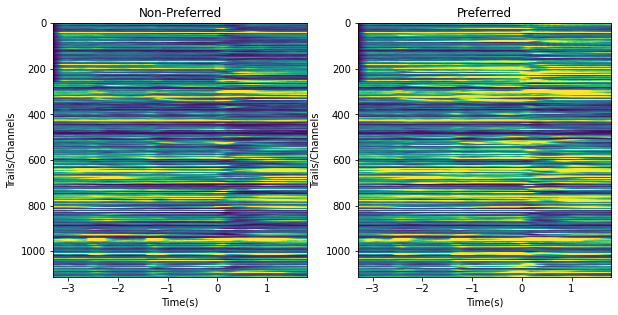

In [ ]:
# plot the new matrices, same code but different results as we have changed the matrices themselves

# do some visualization
fig,ax = plt.subplots(1,2,figsize = (10,6))

# ax[0].imshow(Nopr)  # this way X-axis will show the indices and not actual time points of our time series
# for that we will have to use the extent option 
# extent = [x1,x2,y1,y2]  where x1 and x2 are first and last x values and y1 ans y2 are first and last y values


# Y-axis is actually backwards as in Python the first row plotted is actually at the top and then  it comes downwards
# can simply chage the y1 nad y2 order in the extent of imshow
ax[0].imshow(Nopr, extent = [t[0],t[-1],Nopr.shape[0],0],vmin = 0,vmax = 10)


#then change the aspect ratio according to the data as saw before
ax[0].set_aspect(1/ax[0].get_data_ratio())

ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Trails/Channels')
ax[0].set_title('Non-Preferred')



# plotting the preferred 
ax[1].imshow(Pref, extent = [t[0],t[-1],Pref.shape[0],0],vmin = 0,vmax = 10)
ax[1].set_aspect(1/ax[0].get_data_ratio())

ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Trails/Channels')
ax[1].set_title('Preferred')

plt.show()

# plotting average 

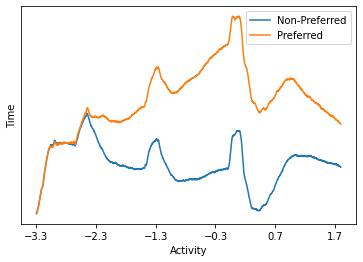

In [ ]:
plt.plot(t,np.mean(Nopr,axis=0),label = 'Non-Preferred')      # axis =0 is important to tell Python along which dimention to averga on , that is, along row or along column
plt.plot(t,np.mean(Pref,axis=0),label = 'Preferred') 
plt.xlabel('Activity')
plt.ylabel('Time')
plt.xticks(np.arange(t[0],t[-1]))
plt.yticks([])

plt.legend()
plt.show()

# creating channel covariance matrix


Here we will compute the covariance matrix of both the preferred and non-preferred data set and then we will average them together
We will do the PCA on the average of the 2 cov mats

We will have to create new data matrices as our data is not in the form of channels * time
But has 1186 rows because there are multiple repetition from the same channel/neurons

We will have to **average over all the repetition of the channel/neuron and then create a new data matrix of channels * time   with 64 channels.**

That is one row will be the average response of one neuron over the different repetitions



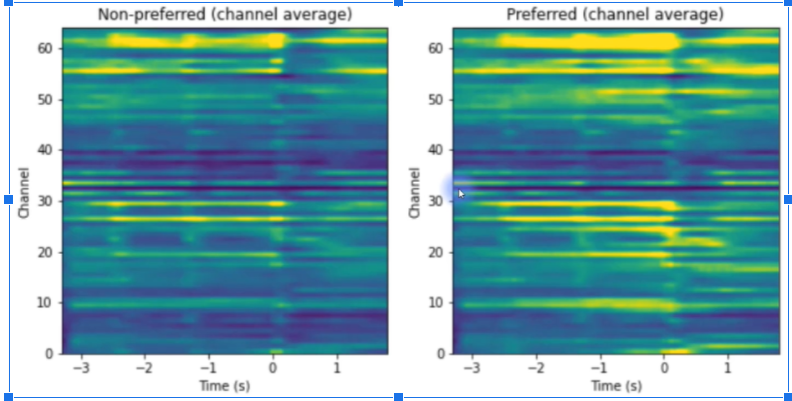

note that earlier we had 1186 (1111 after removing empty rows)rows now **we ended up with 64 rows only**


Then compute the covariance matrix for both matrices and average them together


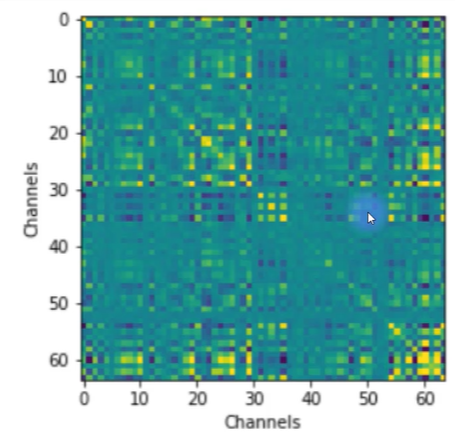

#Then perform PCA on this average covariance matrix



In [ ]:
# compute new data matrices by averging over the repititions of each channel/neuron
# we will select the rows according to the channels in  a similar way as how we selected the finite element rows

nchans = np.max(chanidx)  # to find the number of channels
chanidx == 1  # will provide a vector of Trues and False where channel is equal to 1


# initializing the channel averaged over repitition matrices
chanaveNopr = np.zeros((nchans,len(t)))
chanavePref = np.zeros((nchans,len(t)))

for i in range(1,nchans+1):
  chanaveNopr[i-1,:] = np.mean(Nopr[chanidx==i,:],axis = 0 )
  chanavePref[i-1,:] = np.mean(Pref[chanidx==i,:],axis = 0 )

print(chanaveNopr.shape)  # it is 64*5101  which is correct as number of rows is same as channel number


(64, 5101)


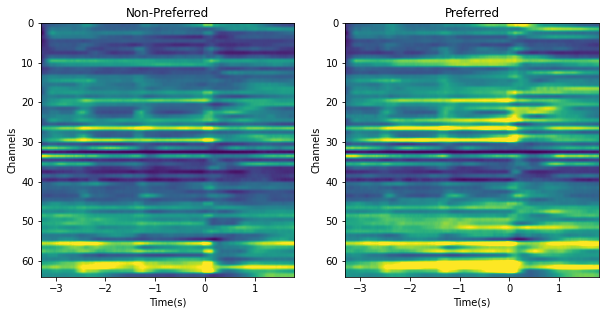

In [ ]:
# plot the new averaged matrices

fig,ax = plt.subplots(1,2,figsize = (10,6))


#plotting the NOn-Preferred
ax[0].imshow(chanaveNopr, extent = [t[0],t[-1],nchans,0],vmin = 0,vmax = 10)
ax[0].set_aspect(1/ax[0].get_data_ratio())

ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Channels')
ax[0].set_title('Non-Preferred')



# plotting the preferred 
ax[1].imshow(chanavePref, extent = [t[0],t[-1],nchans,0],vmin = 0,vmax = 10)
ax[1].set_aspect(1/ax[0].get_data_ratio())

ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Channels')
ax[1].set_title('Preferred')

plt.show()

# compute covariance matrices


(64, 64)


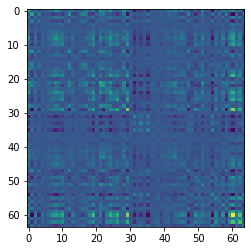

In [ ]:
# first compute cov matrices for both then take average of both

# using np.cov()  function to compute the covariance matrix

covmatPref = np.cov(chanavePref) 
print(covmatPref.shape)  # cheack shape to see it is 64*64 and not 5101*5101
covmatNopr = np.cov(chanaveNopr)

plt.imshow(covmatPref)
plt.show()

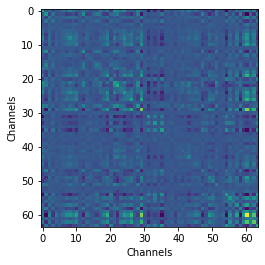

In [ ]:
# taking average of the 2 cov matrices
covmat = (covmatPref+covmatNopr)/2

plt.imshow(covmat)
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

# ED on this Covariance matrix to do PCA

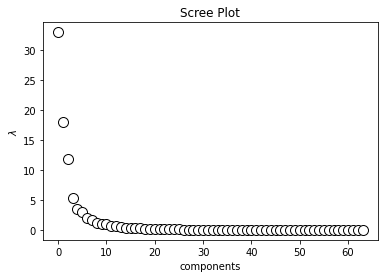

In [ ]:
# ED using np.linalg.eigh()    
#eigh is more stable when you already know that matrix is symmetric ,use this

evals,evecs = np.linalg.eigh(covmat)

#sorting the eigenvectors using np.argsort()  , this sort ascending by default but we want descending so we will reverse the order
# vector of sorting indices
sidx = np.argsort(evals)[::-1]

#sort the eig vals
evals = evals[sidx]
# dont forget to sort the eig vectors too
evecs = evecs[:,sidx]


plt.plot(evals,'ko',markerfacecolor='w',markersize=10)  #sorted ascending by default
plt.xlabel('components')
plt.ylabel('$\lambda$')
plt.title('Scree Plot')
plt.show()

# we see most of what is interesting in the data is happening in the 3 dimensions
# rest are very less
# here we will take first 2 dimensions to make plotting easier


# compute PC timeseries
multiply the elements of the eigenvectors with the corresponding channel in the data matrix and then add them together 

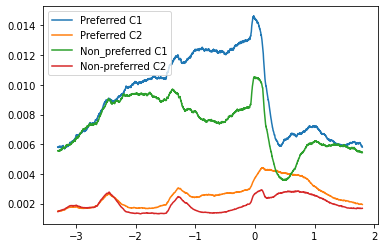

In [ ]:

# eigen vectors do not have any interinsic sign 
# we will 'fix' the sign
# we will look for the largest magnitude component in each eigen vector 
# if it is positive we will keep it same , if the largest magnitude is negative then we will flip the sign of the eigenvector


for i in range(2):    # since we only want fist 2
  #find largest component sign
  maxi = np.argmax(abs(evecs[:,i]))  #index of the largest value
  evecs[:,i] *= np.sign(evecs[maxi,i])



# using matrix multiplication
# for first 2 eigen vectors


pcNopr = evecs[:,0:2].T @ chanaveNopr
# this means that the first 2 columns, first 2 eigen vectors transposed are multiplied with chanaveNopr(remember in Python @ symbol for matrix  multiplication)
pcPref = evecs[:,0:2].T @ chanavePref

plt.plot(t,pcPref.T)
plt.plot(t,pcNopr.T)
plt.legend(['Preferred C1','Preferred C2','Non_preferred C1','Non-preferred C2'])
plt.show()

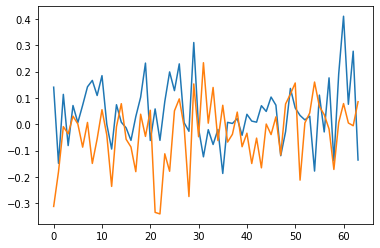

In [ ]:
plt.plot(evecs[:,0:2])

we plotted the 4 time courses of the PC all on the same X-axis

what if there is a better way to visualize the data :

that is to show each time point in the space defined by the PC1 and PC2 and not the present axis of X and Y

that is called **state space trajectory**

called "state space" as we think of the Principal component as defining a space
for the data. and "trajectory" as they are dynamics flowing over time, we get to see them over time


that state space trajectory should look something like this
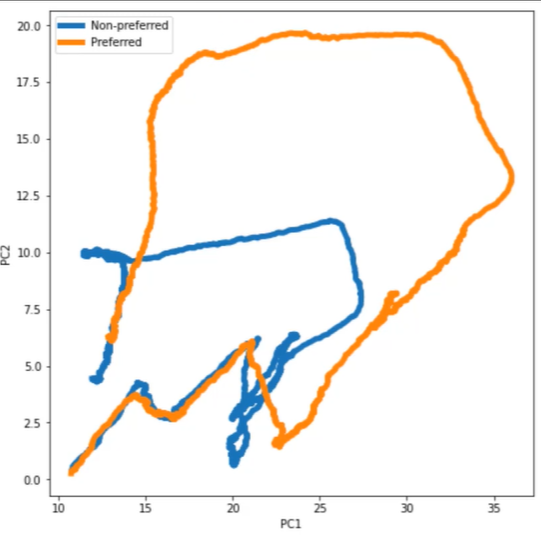

these 4 lines get collapsed into something as shown above in the PC Space

where is time?
the time is actually at the end near 0(beginning of the time series), each point will be plotted as time increases for the 2 timeseries and we see that both of them start seperating from each other as the time increases. And toward the end of the epoch the timeseries mergh together again (point near PC1=12,PC2=4)

looking at the time series in the XY spave we see this behavior as time series are close in the beginning t=-3 and in the middle they move away from each other and then after that merge/get closer to each other again around t=1.7s

new X-axis = PC1
and Y-axis = PC2

very similat to the slide depicting PCA but there the dots were juist data points here each data point is actually a timepoint . So the data plotted in the PC space is going to carve out this 'Trajectory' that is going over time


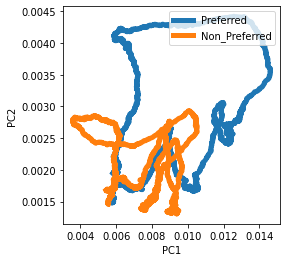

In [ ]:
# intead of plotting time VS pcPref
# we will plot pcPref's   1st PC VS 2nd PC
# that is , PC1 VS PC2 of same data matrix

plt.plot(pcPref[0,:],pcPref[1,:],linewidth = 5,label = 'Preferred')
plt.plot(pcNopr[0,:],pcNopr[1,:],linewidth = 5 , label = 'Non_Preferred')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show()

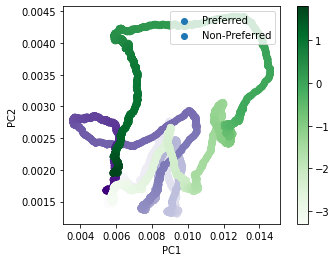

In [ ]:
# we see that the preferred movement has a much larger departure in its trajectory than that of the non-Preferred movement 
# all this is happening over time
# but which direction is it flowing in? 
# where is the beginning and the end of the trail?

#bonus: illustrate time in a better way
# we will recreate the state space trajectory 
# to represent the time better we will change the color darkness as time increases. As time increases thhe plot will go darker and darker


# method 1: make a scatter plot, do not plot as a line
# matplotlib solution
plt.scatter(pcNopr[0,:], pcNopr[1,:], cmap ='Purples', c=t,label = 'Preferred')
# Python need to be told diffrently to use a different color values for all the plots/dots
# c = t     c is for colormapping and we set it equal to t (vector of time points)

plt.scatter(pcPref[0,:], pcPref[1,:], cmap ='Greens', c=t,label = 'Non-Preferred')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show() 